In [1]:
# imports
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import cmsc606.hw.hw3.hw3_impl as impl

In [2]:
# initialize variables
DATA_ROOT = "../data"

# define transforms
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [3]:
# download dataset
def download_mnist_dataset(root: str):
    mnist_data = datasets.MNIST(
        root=root,
        train=True,
        download=True,
        transform=transforms.ToTensor()
    )
    return mnist_data

mnist_data = download_mnist_dataset(root=DATA_ROOT)

In [4]:
# define datasets
train_dataset = datasets.MNIST(
    root=DATA_ROOT, train=True, download=False, transform=transform
)

test_dataset = datasets.MNIST(
    root=DATA_ROOT, train=False, download=False, transform=transform
)

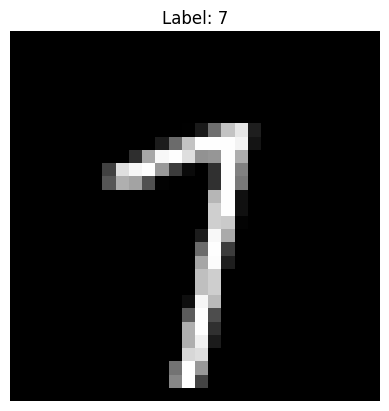

In [5]:
# show image to verify dataset
def show_mnist_image(index: int):
    image, label = mnist_data[index]
    
    image = image.squeeze().numpy()
    
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()
    
show_mnist_image(42)

In [6]:
W, b = impl.my_train(train_dataset)

Epoch [1/5], Loss: 8.0416, LR: 1.2000
Epoch [2/5], Loss: 4.5952, LR: 0.8400
Epoch [3/5], Loss: 3.2783, LR: 0.5880
Epoch [4/5], Loss: 2.5140, LR: 0.4116
Epoch [5/5], Loss: 2.0789, LR: 0.2881


In [7]:
test_error_rate = impl.my_test(W, b, test_dataset)

Test Accuracy: 88.76%
Test error rate: 11.24%
✅ Test passed, error rate is below 12.5%
